# Weather

In [1]:
import requests
import json
import csv
import pandas as pd

In [2]:
lat = "40.7282"
lon = "-73.7949"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
forecast = json_file["properties"]["forecast"]
new_requests = requests.get(forecast)

json = new_requests.json()
#json

In [3]:
data_file = open("weather.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

per = json["properties"]["periods"]
    
for i in per:
    name = i["name"]
    temp = i["temperature"]
    detail = i["detailedForecast"]
    csv_writer.writerow([name, temp, detail])
        
data_file.close()

In [4]:
sheet = pd.read_csv("weather.csv")
sheet

,Day,Temperature,Description
0,This Afternoon,51,"Mostly sunny, with a high near 51. West wind a..."
1,Tonight,30,"Partly cloudy. Low around 30, with temperature..."
2,Sunday,41,"Mostly sunny, with a high near 41. Wind chill ..."
3,Sunday Night,31,"Mostly clear, with a low around 31. Wind chill..."
4,Monday,50,"Sunny, with a high near 50. Southwest wind 8 t..."
5,Monday Night,35,"Mostly clear. Low around 35, with temperatures..."
6,Tuesday,56,"Sunny, with a high near 56."
7,Tuesday Night,39,"Partly cloudy, with a low around 39."
8,Wednesday,54,"Mostly cloudy, with a high near 54."
9,Wednesday Night,46,A chance of rain showers after 8pm. Mostly clo...


In [5]:
from matplotlib import pyplot as plt
import numpy as np

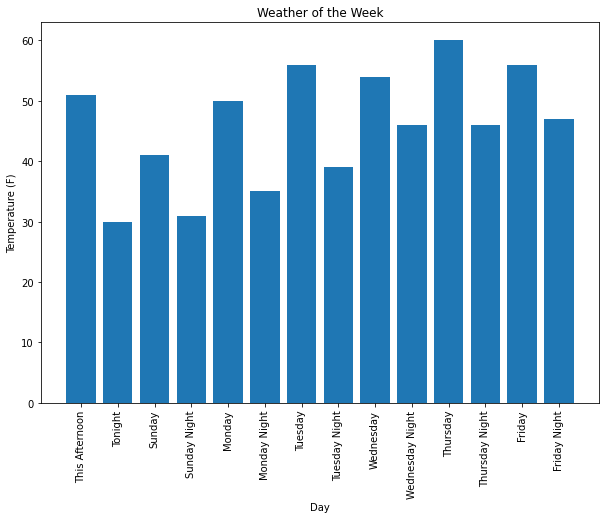

In [6]:
df = pd.DataFrame(sheet)

day = df["Day"]
temp = df ["Temperature"]

fig = plt.figure(figsize = (10, 7))
plt.bar(day, temp)

plt.xlabel("Day")
plt.ylabel("Temperature (F)")
plt.title ("Weather of the Week")
plt.xticks(rotation=90) #https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

plt.show()

# Public Holiday

In [8]:
year = "2020"
countryCode = "US"

# How the API is working
# Each of these calls goes to a different site with different types of info on the country whose code you input or about a year you input.
# The API pulls the JSON and returns it.

# Gets country info for the given country
country_info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")
# Gets all available countries
avail_country = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")

# Gets long weekends for a given country
long_wknd = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}")

# Gets public holidays
holiday = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
# Returns wheteher or not today is a public holiday
today_hol = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}")
# Returns the upcoming holidays for the next year for a given country
next_hol_country = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}")
# Returns the upcoming holidays for the next 7 days
next_hol = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")


In [13]:
data_file = open("holiday.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Country", "Holidays"])

def get_hol(countryCode):
    year = "2023"
    try:
        holiday = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
        json_file = holiday.json()
            
        count_hol = len(json_file)
        csv_writer.writerow([countryCode, count_hol])
        
        return print(f"{countryCode}:{count_hol}")
    except: 
        print (f"Holiday info not available for {countryCode}")

In [10]:
get_hol("US")
get_hol("AD")
get_hol("CN")
get_hol("AR")
get_hol("IE")
get_hol("JP")
get_hol("MT")
get_hol("VN")
get_hol("BR")
get_hol("CN")

data_file.close()

US:13
AD:14
CN:7
AR:16
IE:11
JP:16
MT:14
VN:4
BR:14
CN:7


In [11]:
sheet = pd.read_csv("holiday.csv")
sheet

,Country,Holidays
0,US,13
1,AD,14
2,CN,7
3,AR,16
4,IE,11
5,JP,16
6,MT,14
7,VN,4
8,BR,14
9,CN,7


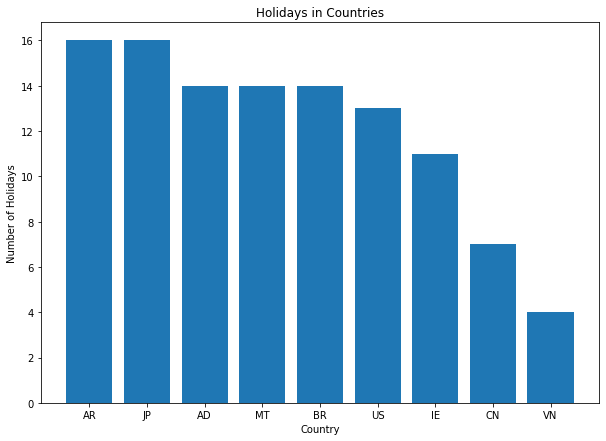

In [12]:
df = pd.DataFrame(sheet)
df_sorted = df.sort_values('Holidays', ascending=False)

coun = df_sorted["Country"]
hol = df_sorted ["Holidays"]

fig = plt.figure(figsize = (10, 7))
plt.bar(coun, hol)

plt.xlabel("Country")
plt.ylabel("Number of Holidays")
plt.title ("Holidays in Countries")

plt.show()